# Functional analysis of gene signatures

## Create files needed for analysis

In [27]:
mkdir -p /mnt/storage/$USER/jupyternotebooks/functional_analysis_gene_signatures/
cd /mnt/storage/$USER/jupyternotebooks/functional_analysis_gene_signatures/

In [28]:
ln -sf /mnt/storage/r0877717/jupyternotebooks/Task_1/deseq.results.tsv .

In [34]:
head deseq.results.tsv #added "Gene" as first column header using Jupyter text editor

gene	baseMean	log2FoldChange	lfcSE	stat	pvalue	padj
Pltp	788.193849107822	-1.87567519803683	0.30375605639859	-6.17493925973138	6.61889119359884e-10	7.8850850789343e-06
Selenbp2	10603.361012217	2.53587449359263	0.443480588073312	5.71811836141387	1.07710108582218e-08	6.41575261769982e-05
Cyp2a22	348.413632145765	-2.94520308688446	0.527173693734995	-5.58677931369806	2.31319371737654e-08	9.18569225170225e-05
Slc41a2	595.551811220306	1.40838733374297	0.277614028722559	5.073185026793	3.9121177142577e-07	0.0011651264582488
Id3	813.6067010813	1.45648742857059	0.292553281101243	4.97853732177611	6.40665906685394e-07	0.00152645058926862
Lyve1	136.070171433875	-1.86069620937518	0.393530949339408	-4.72820806723993	2.26510005534241e-06	0.00385487670847058
Osgin1	4134.63640615593	1.58900474600672	0.335840260096192	4.73143019110215	2.22943488187494e-06	0.00385487670847058
Ugt2b38	123.971859943455	2.19888592284333	0.480620585638116	4.5750972566518	4.75998811941646e-06	0.00515506713332803
Cidec	712.2340

In [48]:
head -1 deseq.results.tsv
grep -n Pltp deseq.results.tsv
grep -n Rer1 deseq.results.tsv


gene	baseMean	log2FoldChange	lfcSE	stat	pvalue	padj
2:Pltp	788.193849107822	-1.87567519803683	0.30375605639859	-6.17493925973138	6.61889119359884e-10	7.8850850789343e-06
3395:Rer1	3086.51641080415	-0.0473381493788837	0.244797376902363	-0.193376865299355	0.846663832290622	0.999740530349781


Pltp is downregulated (logFC=-1.8) with a significant pvalue (<0.05).
The housekeeping gene, Rer1, has a logFC close to 0 and is not significant (this is what is expected, it shows stability across sample types). 

## Arbitrary Thresholds: 
Select genes that are up and down regulated by searching for logFC >1 and a pvalue <0.05

In [52]:
awk '$3 != "NA" && $3 > 1 && $7 < 0.05 {print ;}' deseq.results.tsv | wc -l

13


In [53]:
awk '$3 != "NA" && $3 < -1 && $7 < 0.05 {print $1}' deseq.results.tsv | wc -l

13


In [37]:
awk '$3 != "NA" && $7 < 0.05 {print ;}' deseq.results.tsv | wc -l

26


I found that all of the genes with padj <0.05 are selected if logFC >1 or <-1 (there are 26 of them; 13 up-regulated and 13 down-regulated). Because there are so few genes to start with, I think this is a good threshold to capture a maximum of genes. Analysis using the leading edge approach may be be more useful in this case because I have so few genes using arbitrary thresholds.

In [39]:
awk '$3 != "NA" && $3 > 1 && $7 < 0.05 {print $1}' deseq.results.tsv > up-logFC1-p05.txt

In [40]:
awk '$3 != "NA" && $3 < -1 && $7 < 0.05 {print $1}' deseq.results.tsv > down-logFC1-p05.txt

In [41]:
#count how many genes are significantly regulated between two groups
wc -l up-logFC1-p05.txt
wc -l down-logFC1-p05.txt

13 up-logFC1-p05.txt
13 down-logFC1-p05.txt


## g: Profiler

Up-regulated genes:

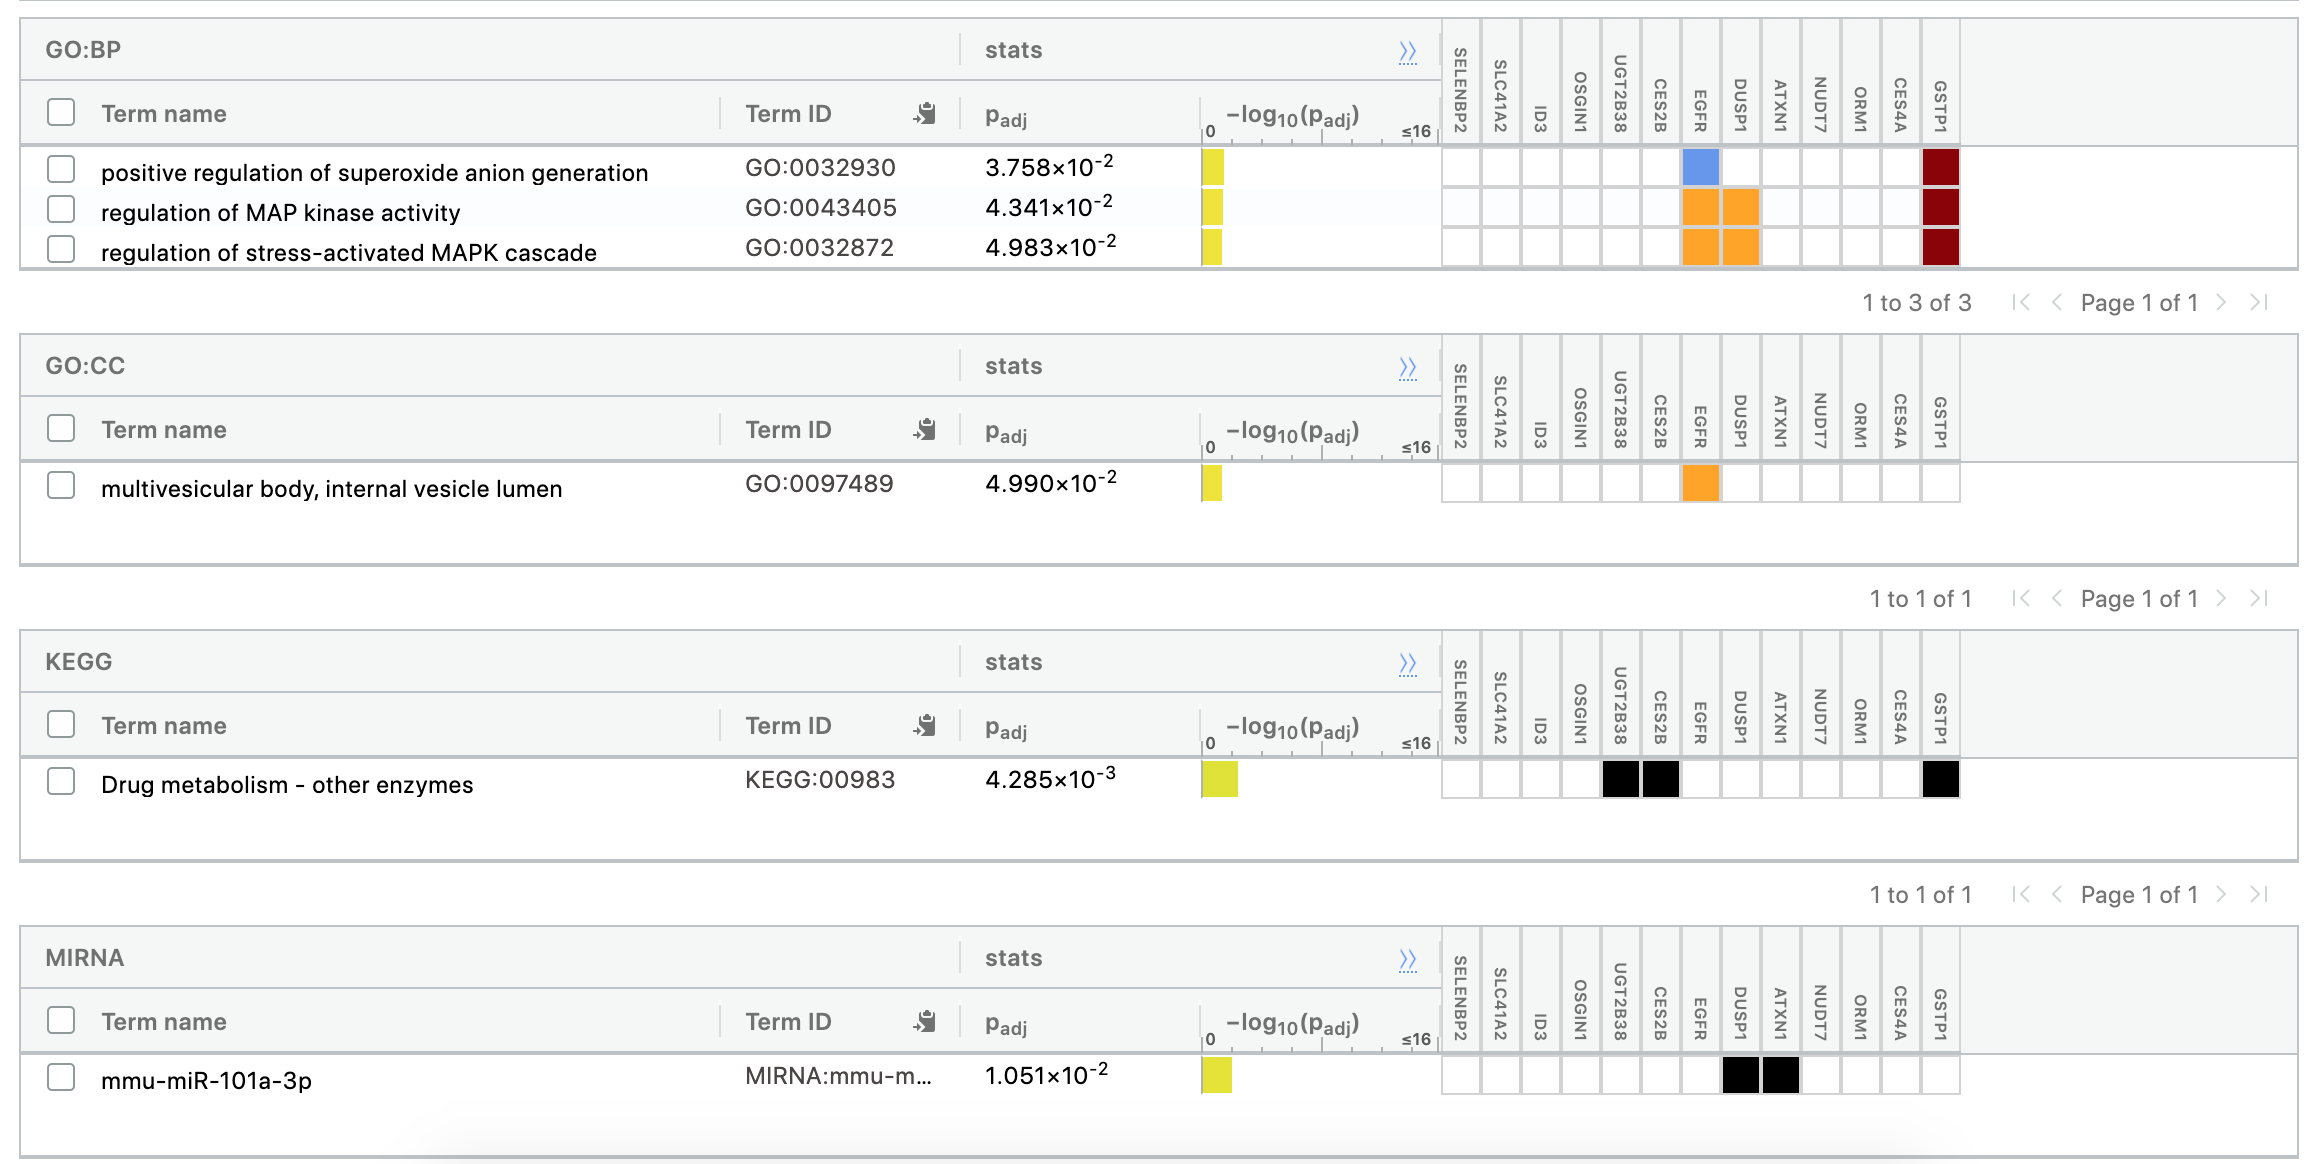

Down-regulated genes: 

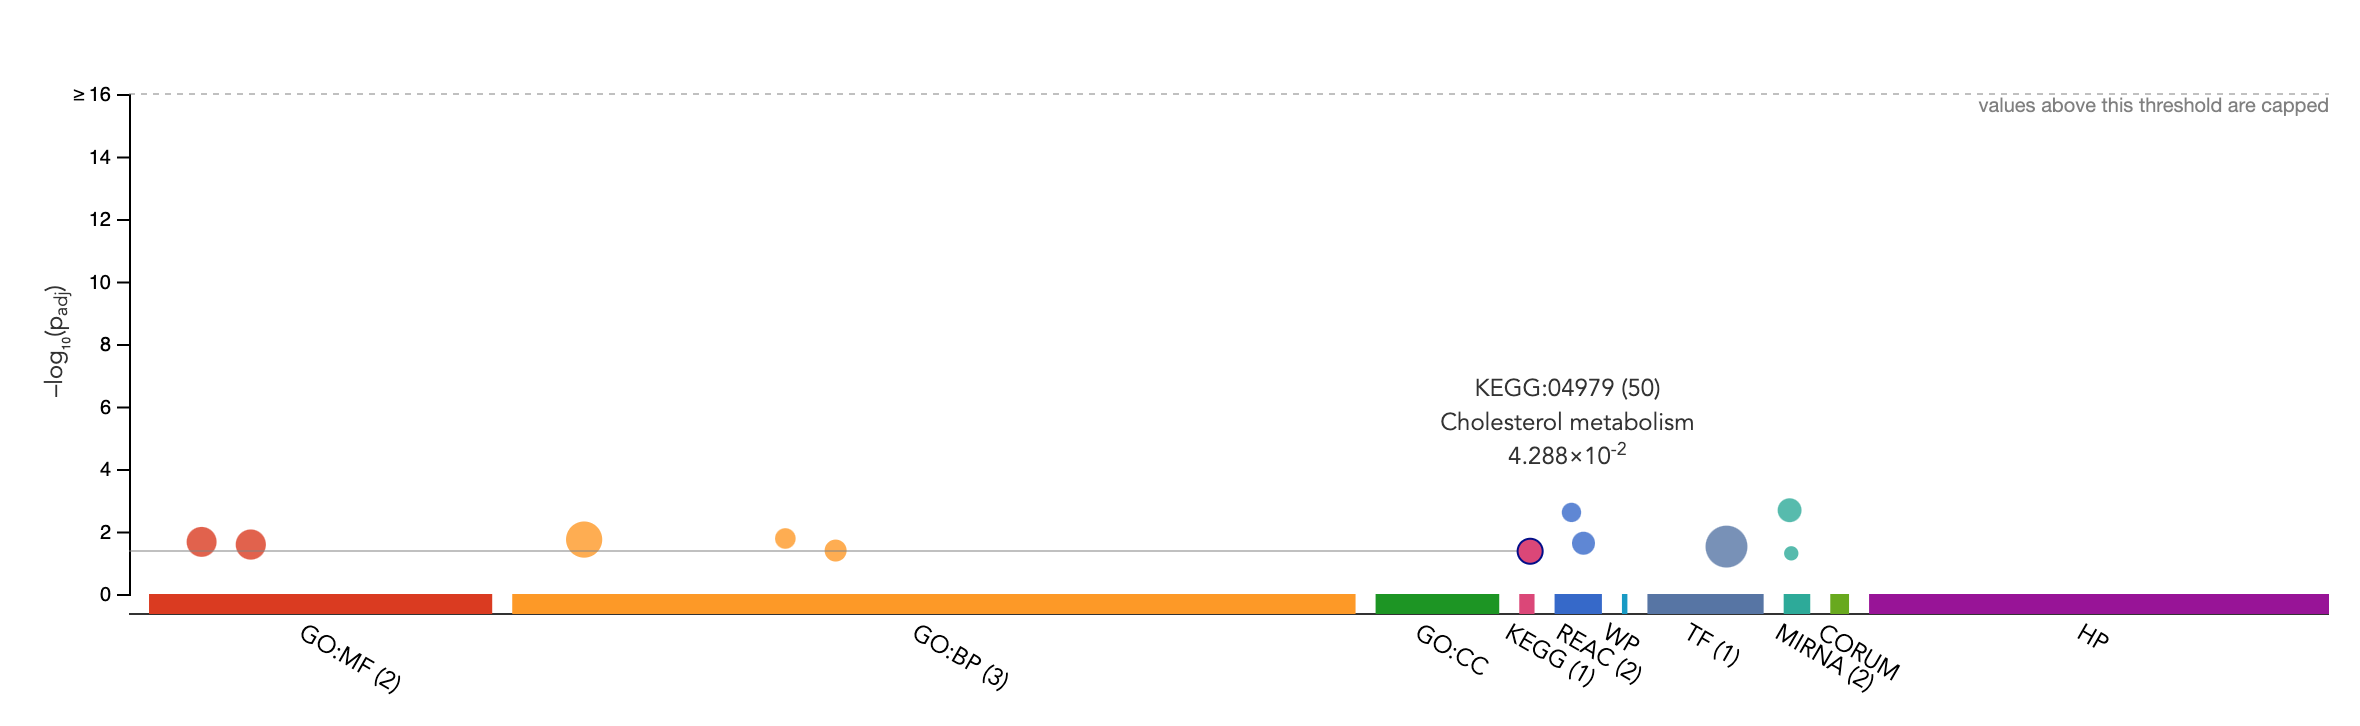

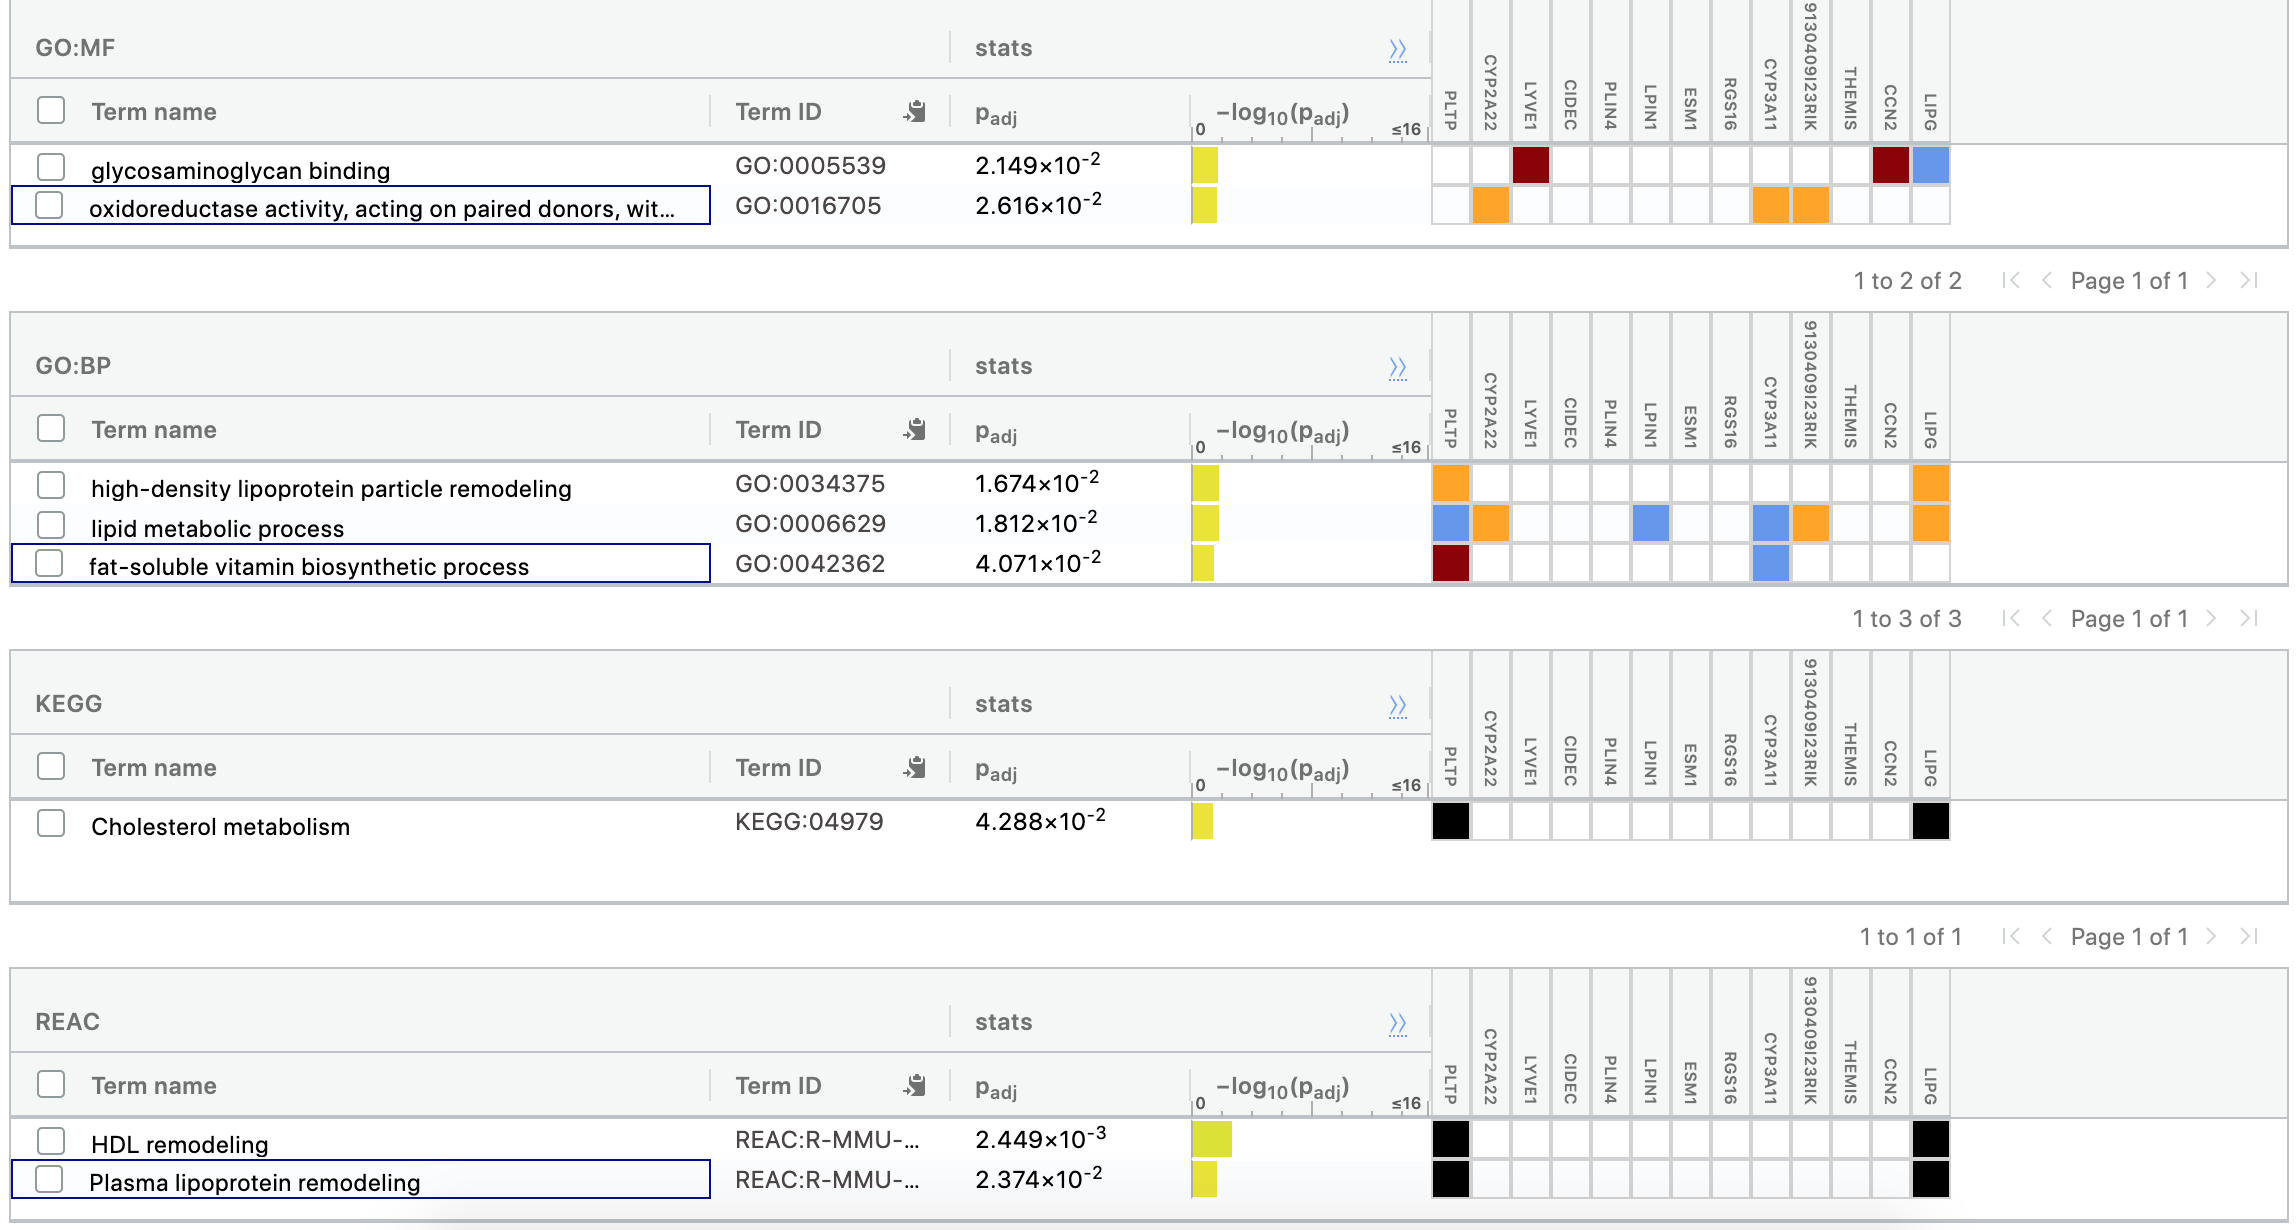

The p-values are not extremely low in general for the up- and down-regulated genes. I didn't see much of interest in the up-regulated genes. The down-regulated genes show an enrichment of the cholesterol metabolism kegg pathway with the Pltp and Lipg genes being significantly regulated.  

## GORilla: determine the "leading edge"

Because I saw so few genes with the arbitrary threshold approach, it may be better to use the leading edge approach instead to look at more than just 26 genes.

In [25]:
cat deseq.results.tsv | sort -k 3,3gr | awk '$3 != "NA" {print $1}' | grep -v Gene | head

Moxd1
Gm12185
Uckl1os
Dmbt1
Gm7457
Hapln1
Olfr1393
D430041D05Rik
Twist2
Ramp3
grep: write error: Broken pipe
sort: write failed: 'standard output': Broken pipe
sort: write error


In [26]:
cat deseq.results.tsv | sort -k 3,3gr | awk '$3 != "NA" {print $1}' | grep -v Gene > deseq.results.sortFCdesc.txt

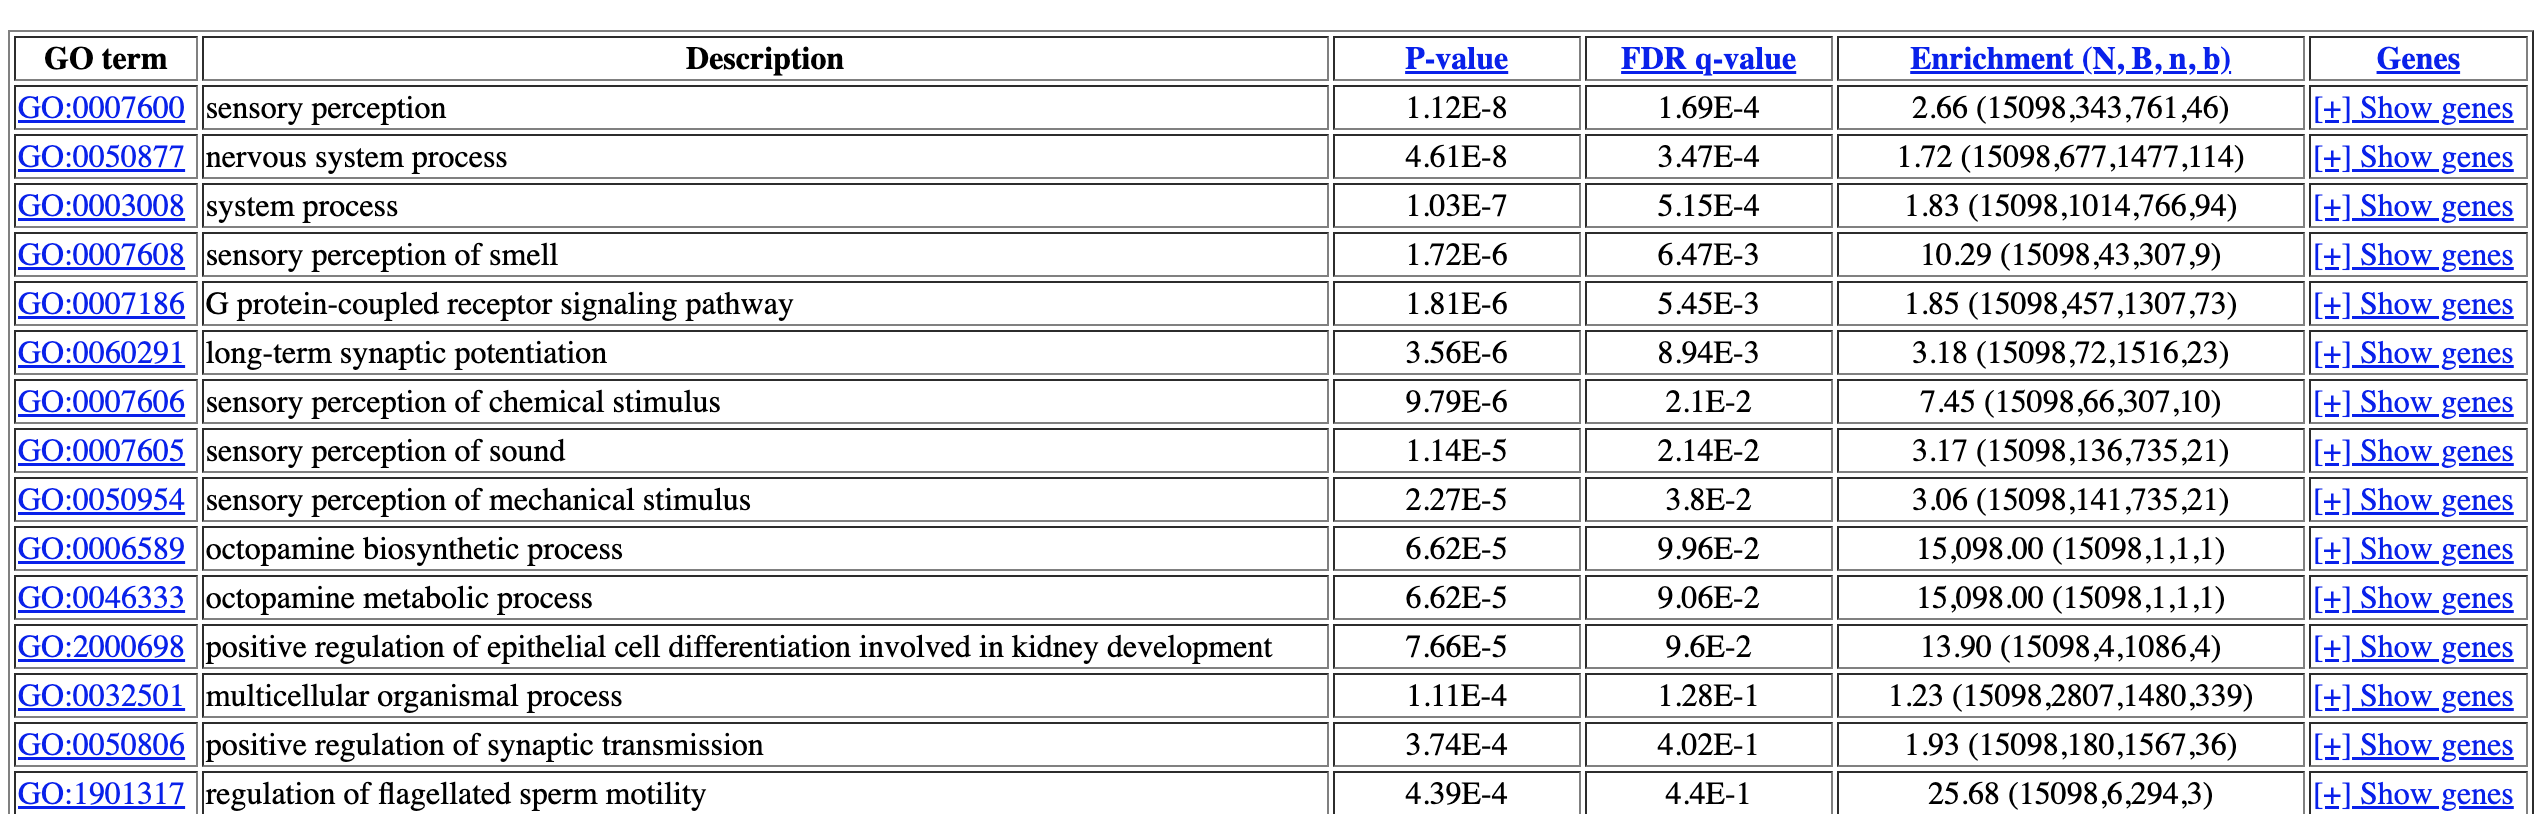

I don't see terms related to fatty acid metabolism here.

Doing the same as above but in ascending order (most down-regulated gene first).

In [42]:
cat deseq.results.tsv | sort -k3,3g | awk '$3 != "NA" {print $1}' | grep -v Gene > deseq.results.sortFCasc.txt

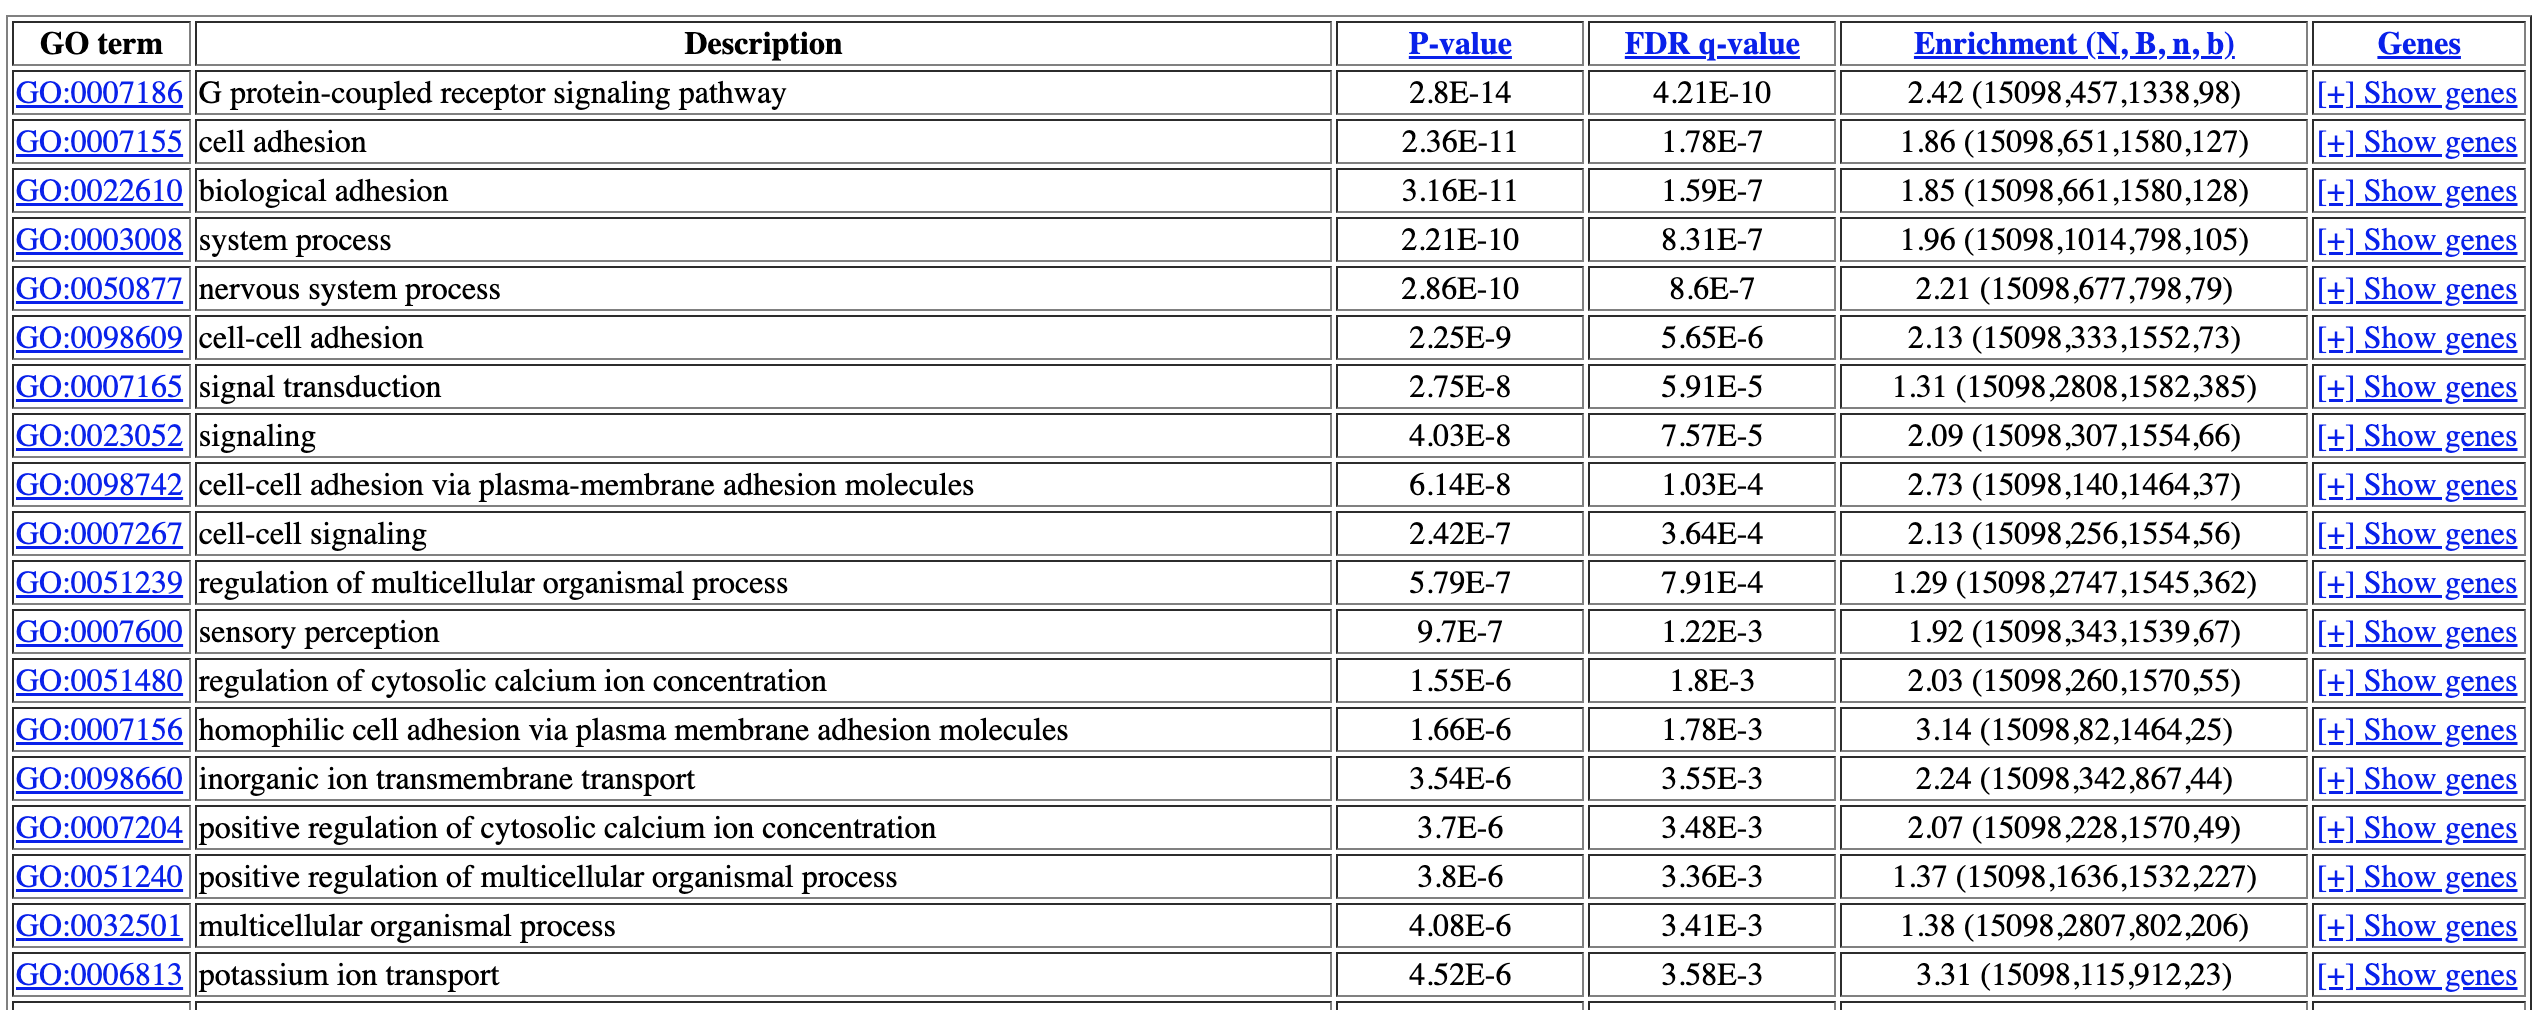

Again, nothing is jumping out here. 

## GSEA analysis

Generating a .rnk file: 

In [46]:
cat deseq.results.tsv | sort -k 3,3gr | awk '$3 != "NA" {print $1, $3}' | grep -v Gene | tr ' ' '\t' > deseq.logFC.rnk

In [47]:
#I manually removed the header in textedit
head deseq.logFC.rnk

Moxd1	8.36555690483722
Gm12185	6.09063323350851
Uckl1os	6.02186822148721
Dmbt1	5.59052121771929
Gm7457	5.53175915317086
Hapln1	5.20074787938114
Olfr1393	5.20074787938114
D430041D05Rik	5.18163267442322
Twist2	5.15959778216855
Ramp3	5.09061688562473


Positive regulation: 

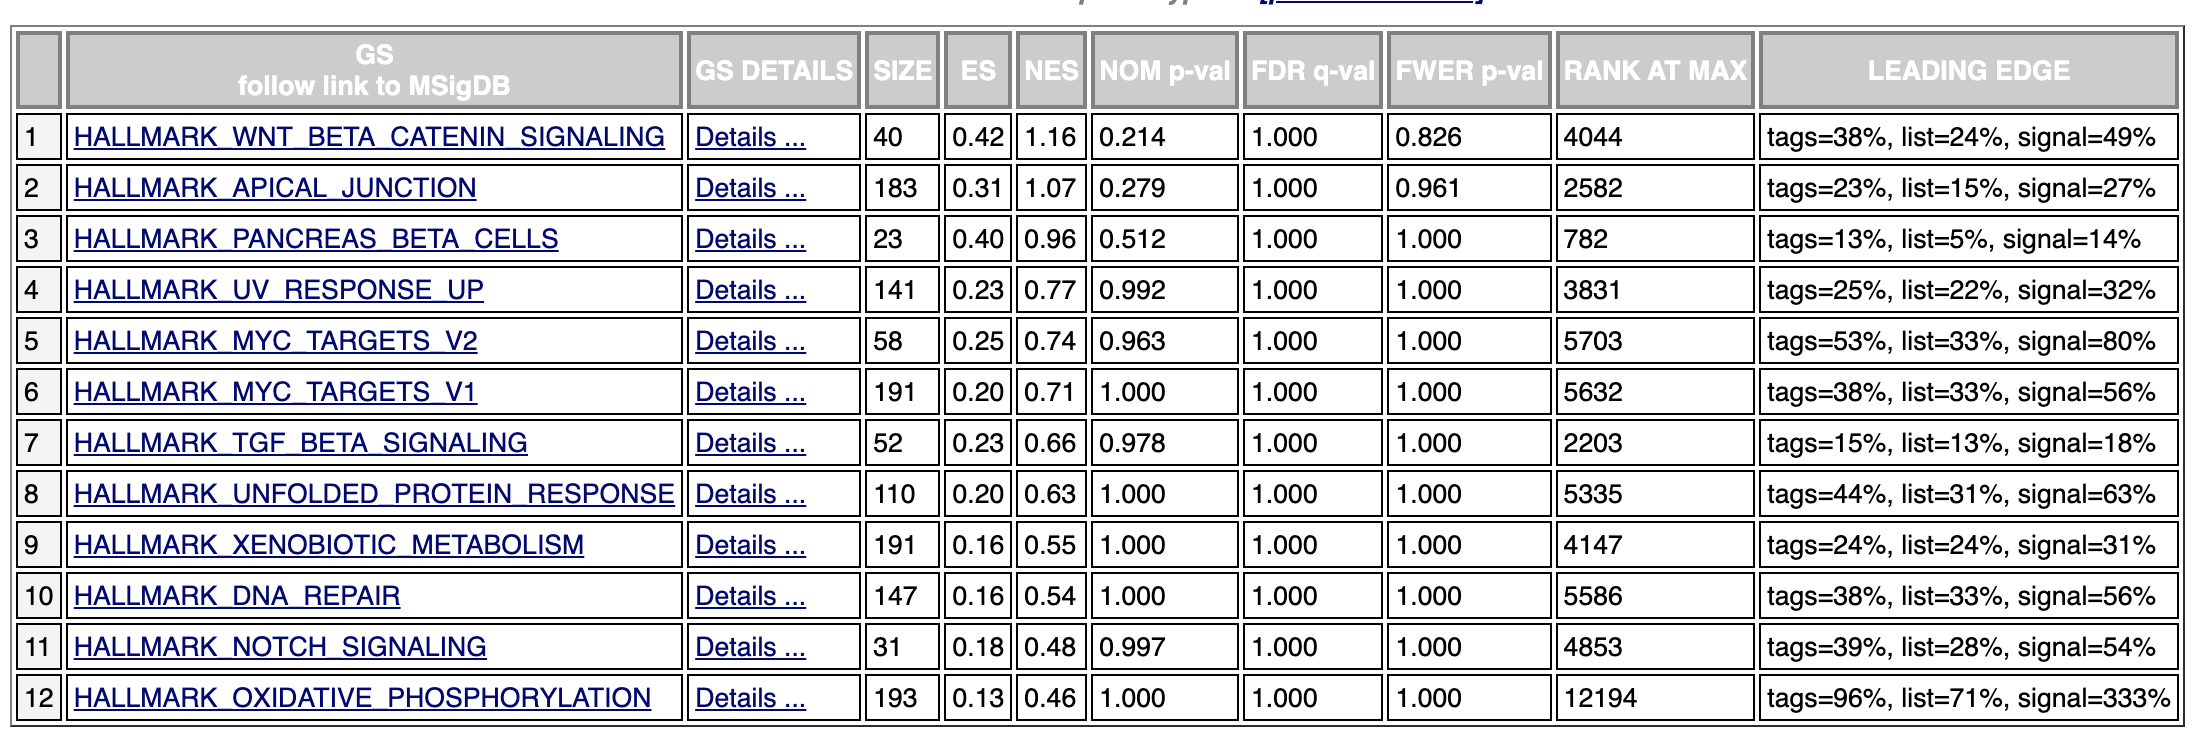

The paper mentions up-regulation of fatty acid metabolic processes -- I don't really see anything here.

Negative regulation: 

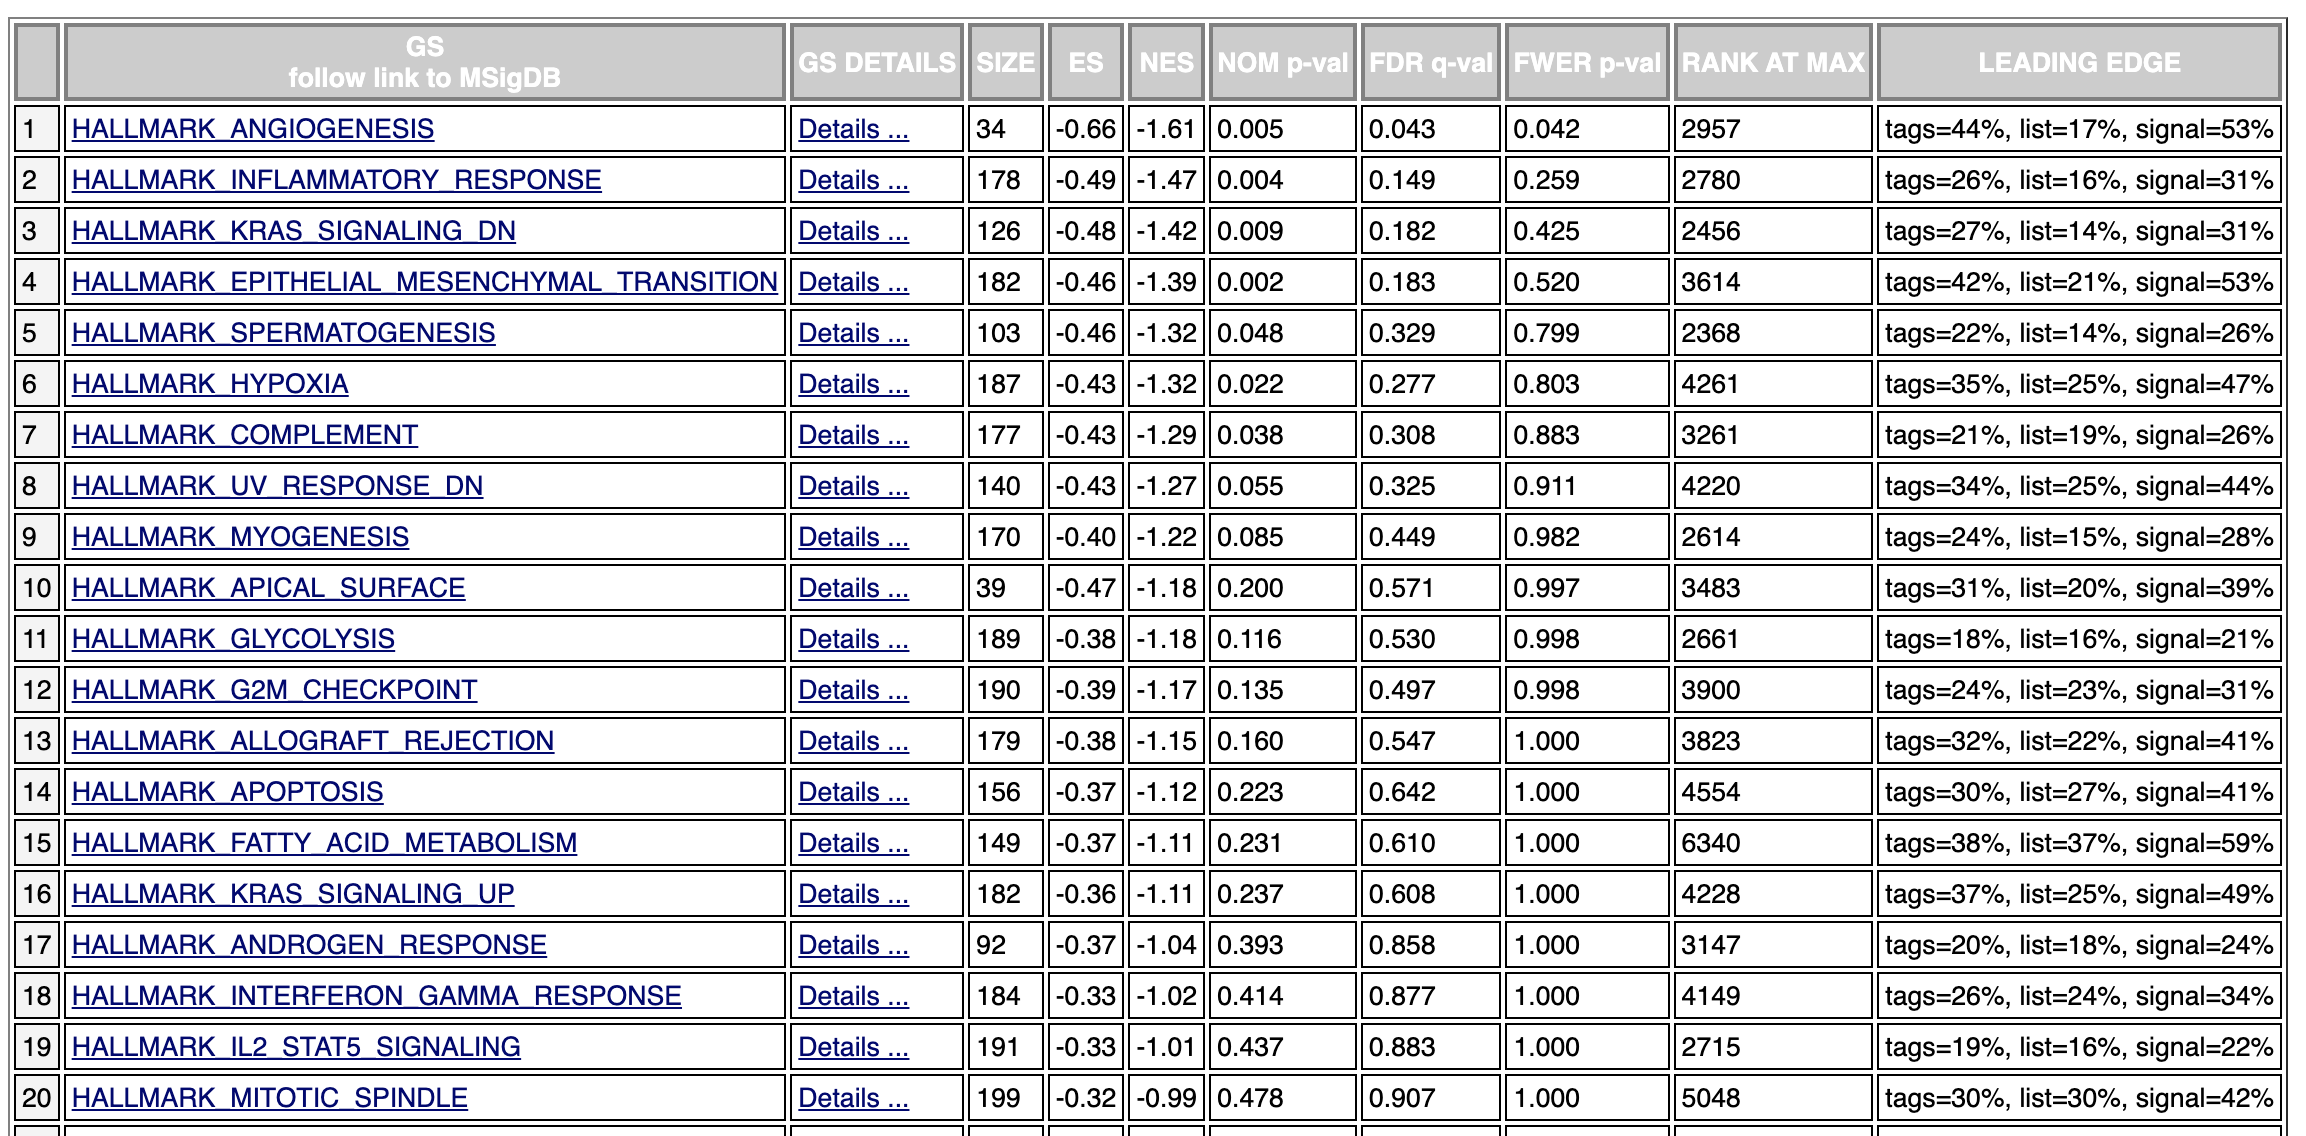

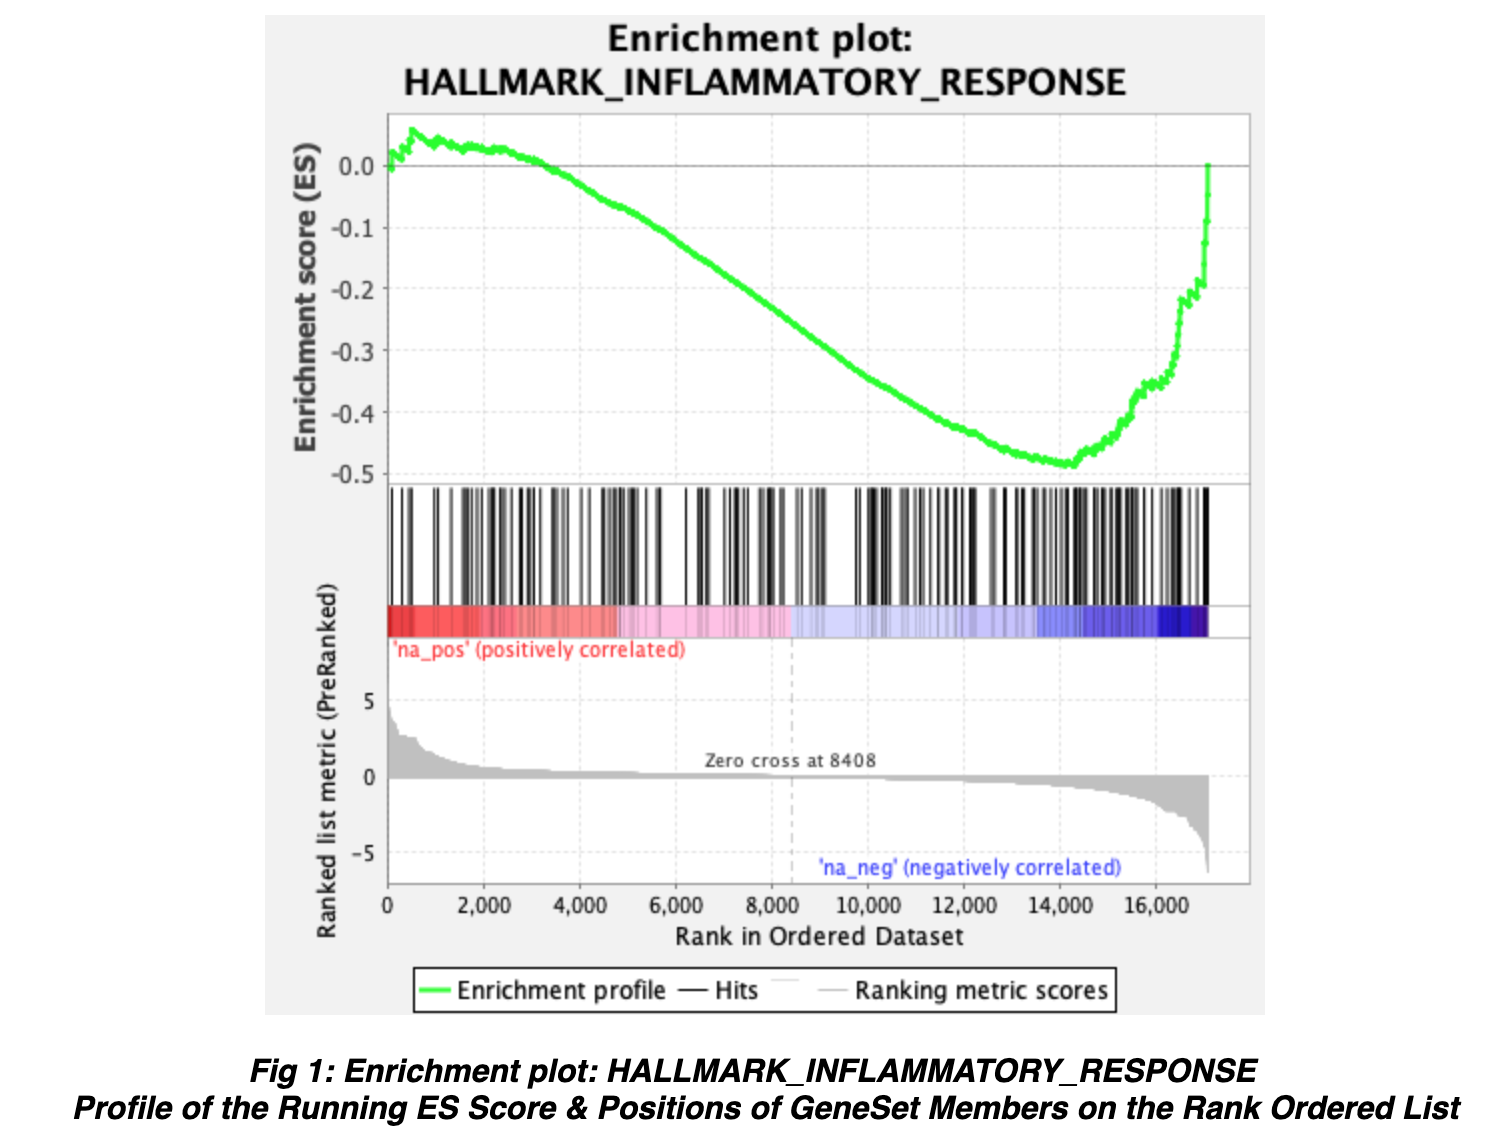

The paper mentions negative regulation of tumor necrosis factor production; again, I don't see much here. 
There is a down-regulated inflammatory response, which might indicate healthier tissue in the test group.

## Motif discovery; upstream TF identification

I went through the process of using cytoscape for motif discovery as practice; I have very few genes that pass the arbitrary cutoff so I don't expect it to be very helpful in this case. I did have some good NES scores. I found a  candidate DNA binding motif with targets in five of the up-regulated genes. 

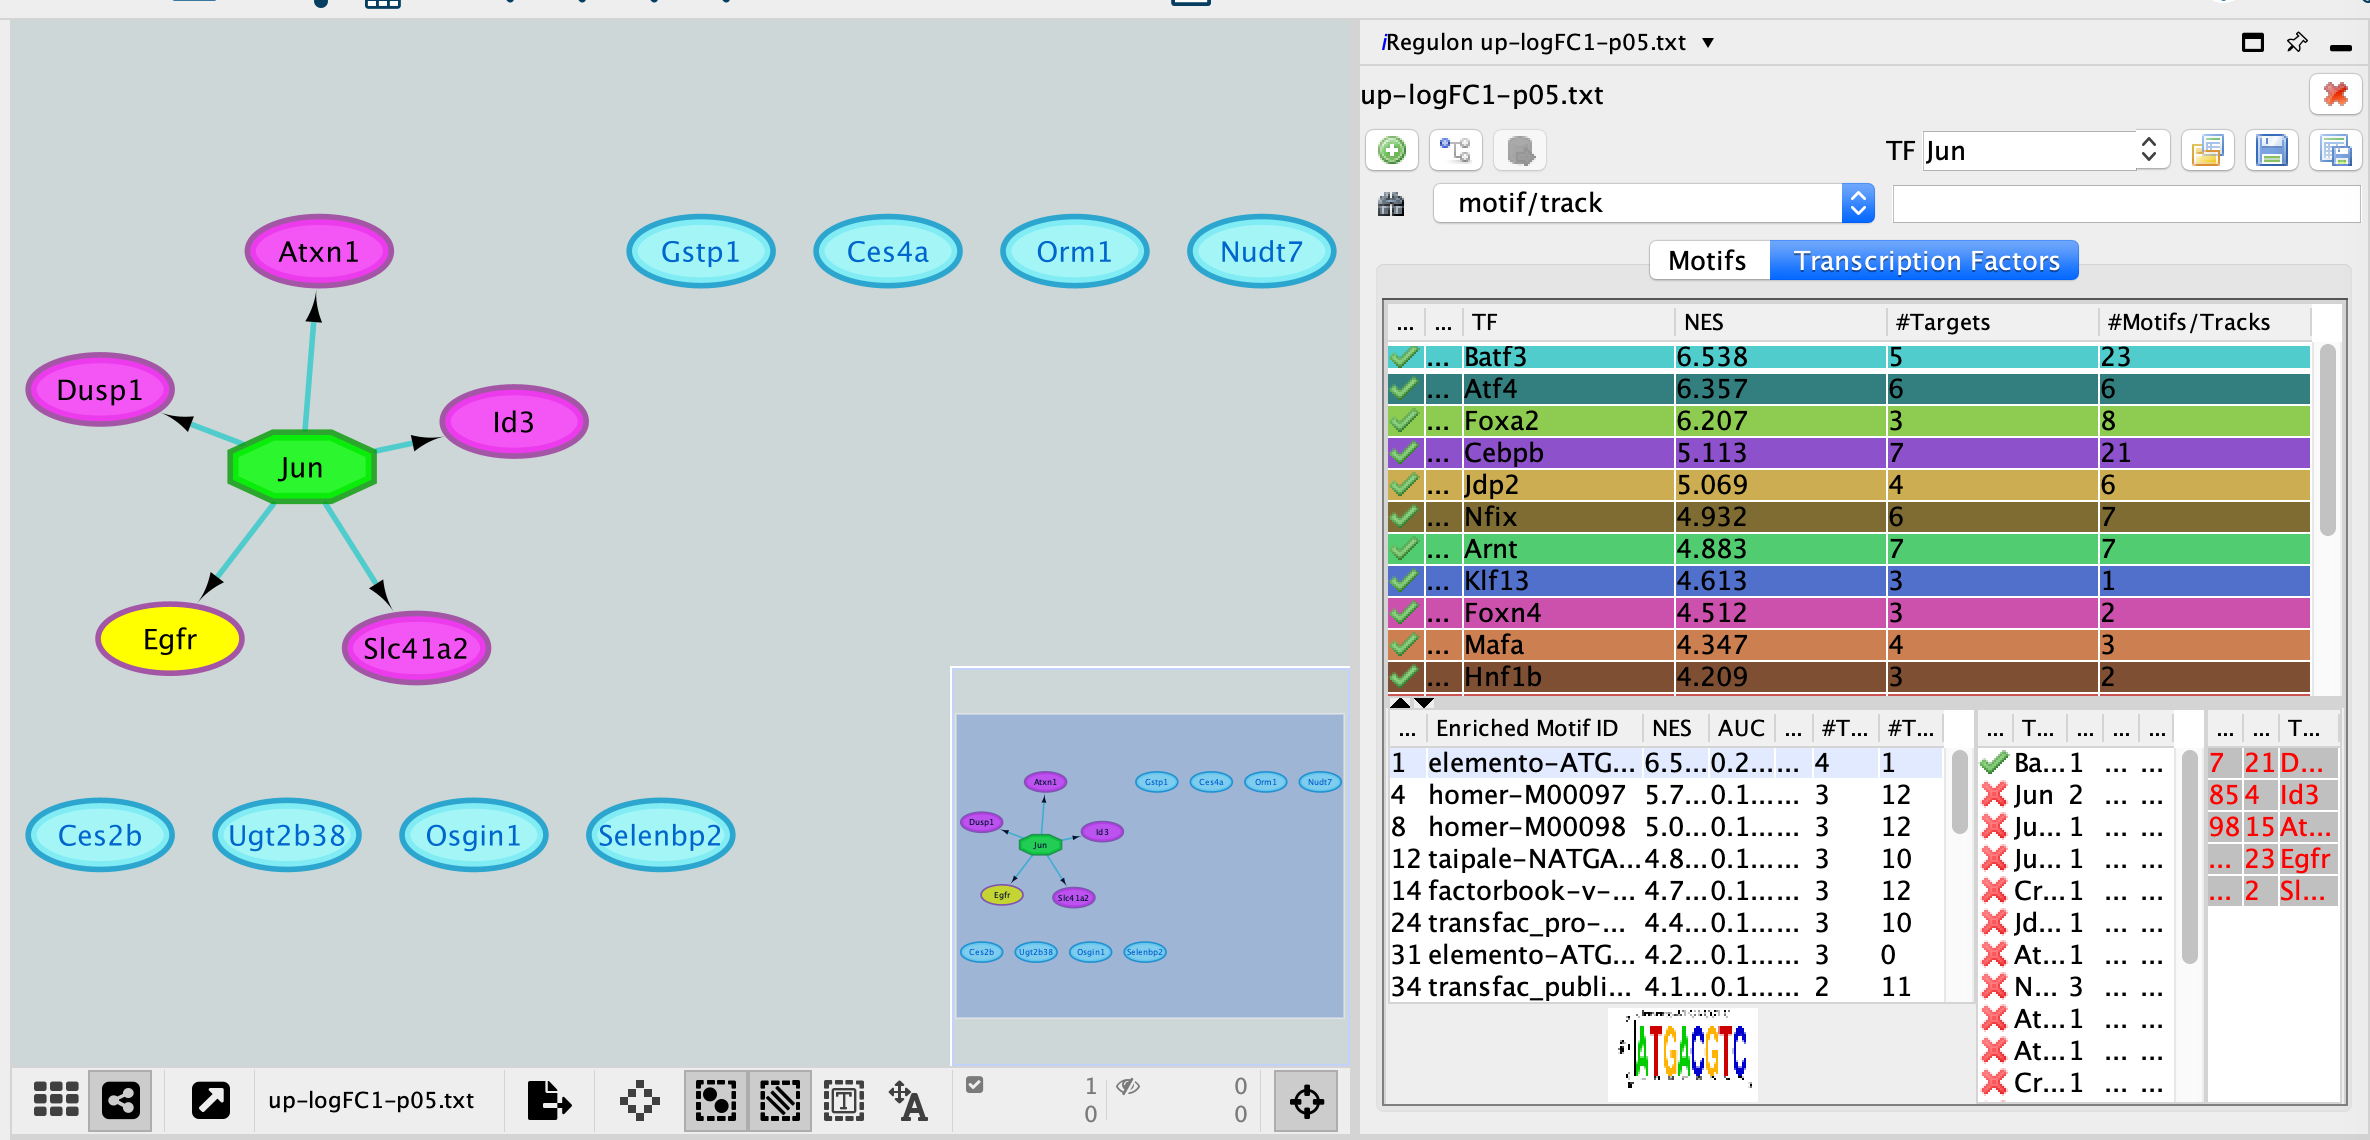

## Final Conclusions

Overall, this dataset was difficult to analyze due to the low number of differentially regulated genes I obtained. Based on the paper, I was expecting to find a clear pattern of gene expression. According to the authors, the supplement on 4-HPAA seemed to have an effect on liver health from visually looking at stained section of tissue and from the ~300 differentially expressed genes identified between the treatment groups. 

From my analysis, I found a significantly down-regulated gene, Pltlp, which is involved in the transfer of phospholipids. This gene was also identified in the study.
Using G:Profiler, I found that cholesterol metabolism was down-regulated in 4-HPAA samples.
Using GORilla, I found that genes dealing with inflammatory response were also down-regulated in these samples.
From these observations, it it seems likely that 4-HPAA is having an impact on transcription within the liver of mice suffering from hepatic steatosis. However, the impact is not very clear, with very few genes being differentially expressed and with not extremely significant p-values. 

The study used 6 replicates of each treatment when performing RNAseq analysis. Since I only used 2 replicates, this could account for the lower the number of DEGs I identified. Another difference between my analysis and the paper is that I used mm10 to align the reads while the authors used GRCm38.